[[ 8  5]
 [ 4  2]
 [12 14]
 [ 3  6]
 [10  5]]

 Matriz distancia 
 [[ 0.  7. 13.  6.  2.]
 [ 7.  0. 20.  5.  9.]
 [13. 20.  0. 17. 11.]
 [ 6.  5. 17.  0.  8.]
 [ 2.  9. 11.  8.  0.]]

El numero menor es: 2.000000 y se encuentra en la fila: 4 de la columna: 0

Iteración # 1
La nueva matriz es:  
 [[ 9.  5.]
 [ 4.  2.]
 [12. 14.]
 [ 3.  6.]]

 Matriz distancia 
 [[ 0.  8. 12.  7.]
 [ 8.  0. 20.  5.]
 [12. 20.  0. 17.]
 [ 7.  5. 17.  0.]]

El numero menor es: 5.000000 y se encuentra en la fila: 3 de la columna: 1

Iteración # 2
 La nueva matriz es: 
 [[ 6.   5.5]
 [ 4.   2. ]
 [12.  14. ]]

 Matriz distancia 
 [[ 0.   5.5 14.5]
 [ 5.5  0.  20. ]
 [14.5 20.   0. ]]

El numero menor es: 5.500000 y se encuentra en la fila: 1 de la columna: 0

Iteración # 3
 La nueva matriz es: 
 [[5.   3.75]
 [4.   2.  ]]

 Matriz distancia 
 [[0.   2.75]
 [2.75 0.  ]]

El numero menor es: 2.750000 y se encuentra en la fila: 1 de la columna: 0

Iteración # 4
 La nueva matriz es: 
 [[4.5   2.875]]

La grafica

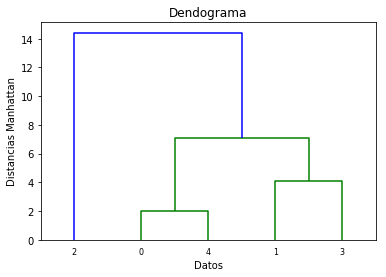

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar

def dis_manh(m):
  dis=[]
  a=0
  for i in range(len(m)):
    
    for k in range(len(m)):
      aux=0
      for j in range(len(m[0])):
        aux=aux+abs(m[k,j]-m[a,j])
      dis.append(aux)
    a=a+1
  return dis

def ordenar(m,dis):
  nuevo=np.zeros((len(m),len(m)))
  s=0  
  for i in range(len(m)):
    for j in range(len(m)):
      nuevo[i][j]=dis[s]
      s=s+1
  return nuevo

def menor(nuevo):
  menor=1000
  fila=0
  columna=0
  for i in range(0,len(nuevo)):
    for j in range(0,i):
      if(i!=j):
        if (nuevo[i][j]<menor):
          menor=nuevo[i][j]
          fila=i
          columna=j
  print("\nEl numero menor es: %f y se encuentra en la fila: %d de la columna: %d" % (menor,fila,columna))
  return fila,columna 


def agrupar(mz,fila,clumna):
  mznew=np.zeros((len(mz)-1,len(mz[0])))
  flag=1
  for i in range(len(mznew)):
    for j in range(len(mznew[0])):
      if(i==columna and flag<=2):
        mznew[i,j]=(mz[i,j]+mz[fila,j])/2
        flag=flag+1
      else:
        mznew[i,j]=mz[i,j]
  return mznew
def graficar_dendograma():
  print("\nLa grafica es: ")
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancias Manhattan")#Distancias Euclideanas
  plt.show()

################################################################################################################
datos = pd.read_csv("ejem.csv", sep=';')
mz=np.array((datos))
print(mz)
iteracion=1
x=dis_manh(mz)
x1=ordenar(mz,x)
print("\n Matriz distancia \n",x1)
fil,col=menor(x1)
new=agrupar(mz,fil,col)
print("\nIteración #",iteracion)
print("La nueva matriz es:  \n",new)

while(len(new)!=1):
  iteracion=iteracion+1
  x=dis_manh(new)
  x1=ordenar(new,x)
  print("\n Matriz distancia \n",x1)
  fil,col=menor(x1)
  new=agrupar(new,fil,col)
  print("\nIteración #",iteracion)
  print(" La nueva matriz es: \n",new)

graficar_dendograma()
  